# Lab 10: K-means Clustering (Unsupervised Learning) 

In this session we will try to understand how K-means clustering algorithm works. It is an unsupervised learning algorithm that allows us to detect pattern or groups on unlabeled data. This algorithm start with initializing a given number K of centroid and it assign each point to the nearest centroid. After assigning all point, each centroid updated as the centroid (mean) of points that have same label as the centroid. Then, we reassign point according to the new centroids. We repeat these steps until the algorithm converge and centroids become stable (don't move anymore)

In the first part, we will implement the K-means algorithm. Then, we will see the effect of centroids  initialization and how dramatically it could affect output clusters. In last part, we will see "elbow" method used for selecting a suitable number of cluster K to use.

### Implement K-means
<font color="blue">**Question 1: **</font> 
- Load data from "clusters_3.txt" file. (use [loadtxt](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.loadtxt.html) function from numpy library).
- Implement the "euclidean_dist" function that calculate the euclidean distance (norm L2: square root of sum of square) between two vectors.
- Implement the cluster assignment step (inner for loop with counter "i"). It consist to assign each point to the nearest cluster centroid. Put the result in "clust_x" array that contains the cluster Id for each point ("m" points).    
**Hint:** You could use "euclidean_dist" function to calculate distances between each point and all the centroids.
- Implement update centroids step (inner for loop with counter "c"). It consist to calculate new centroid as the mean of all point that are assigned to its cluster.

The size of data is: (300, 2)
Number of cluster to find is: 3


<IPython.core.display.Javascript object>


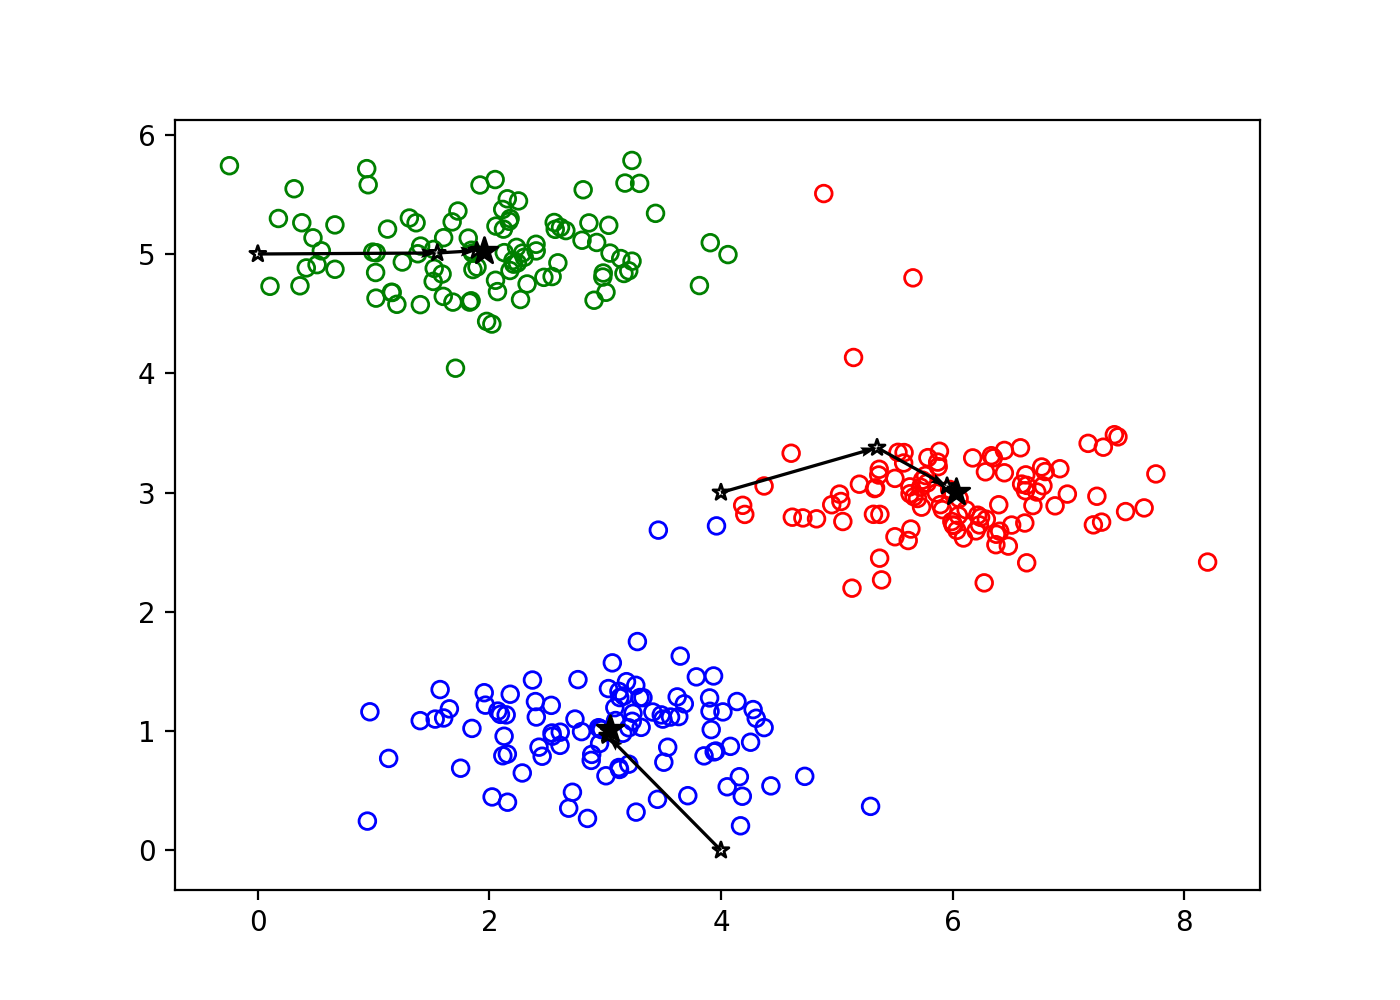

In [41]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

# load data
X =  np.loadtxt("clusters_3.txt", delimiter = '\t') 
print("The size of data is:",X.shape)
m=X.shape[0]

# number of cluster
K = 3
print("Number of cluster to find is:",K)

# Intialize centroids and cluster assignment
#centroid=np.array([[4,5],[4,3],[0,5]],dtype=float)
centroid=np.array([[4,0],[4,3],[0,5]],dtype=float)
clust_x=np.zeros((m,))
centroid_hist=[np.copy(centroid)]

# euclidean distance
def euclidean_dist(x1,x2):
    return np.sum((x1-x2)**2,axis=-1)

# K-means clustering algorithm
def K_means(X,clust_x,centroid,centroid_hist=[],hist=False,max_iter=10):
    k = centroid.shape[0]
    m = X.shape[0]

    for iter_ in range(max_iter):
        # Cluster assignment step
        for i in range(m):
            dist = euclidean_dist(X[i], centroid) 
            clust_x[i] = np.argsort(dist)[0]
        # Update centroids step
        for c in range(k):
            centroid[c,:] = X[clust_x==c].mean(axis=0)

        if (hist):
            centroid_hist.append(np.copy(centroid))
    if (hist):
        return centroid,centroid_hist,clust_x
    return centroid,clust_x

centroid,centroid_hist,clust_x = K_means(X,clust_x,centroid,centroid_hist,hist=True)

# visualize clusters and centroids    
plt.figure("K-means steps",figsize=(7,5))
plt.scatter(X[clust_x==0,0],X[clust_x==0,1],color="blue",marker='o',facecolors='none')
plt.scatter(X[clust_x==1,0],X[clust_x==1,1],color="red",marker='o',facecolors='none')
plt.scatter(X[clust_x==2,0],X[clust_x==2,1],color="green",marker='o',facecolors='none')
plt.scatter(centroid[:,0],centroid[:,1],color="k",marker='*',s=100)
for i in range(len(centroid_hist)-1):
    plt.scatter(centroid_hist[i][:,0],centroid_hist[i][:,1],color="k",marker='*',facecolors='none')
    #plt.plot([centroid_hist[i][:,0],centroid_hist[i+1][:,0]],[centroid_hist[i][:,1],centroid_hist[i+1][:,1]],'k--',linewidth=1)
    plt.quiver(centroid_hist[i][:,0],centroid_hist[i][:,1],centroid_hist[i+1][:,0]-centroid_hist[i][:,0],centroid_hist[i+1][:,1]-centroid_hist[i][:,1],width=.003,color='k',scale=1,scale_units='xy',angles='xy')


### Random initialization of centroids

We see that the final clustering result depend a lot of used initial centroids. It could also change a lot even with few modification in the centroid initialization. Hence, We will randomly initialize centroids and run K-means algorithm several time then we will take the best run. In order to compare different runs and select the best one we calculate a error function that reflect how well is the final clustering. This error is equal to the sum of square error (euclidean distance) between all point and their corresponding cluster centroid. It is given by:
$$cluster\_error(clust\_x,centroid)=\frac{1}{m}\sum_{i=1}^m \left \| x^{(i)}-centroid(x^{(i)}) \right \|^2$$
where:  $\left \| x \right \|^2=\sum_{j=1}^nx_j^2$ 

<font color="blue">**Question 2: **</font> 
- Initialize the minimum error "Jmin" with +infinity.  
**Hint:** You could use numpy.inf value.
- Initialize "centroid" with random K point from original data "X".  
**Hint:** You could generate a [random permutation](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.permutation.html) vector of size "m". Then, extract from it first K element to index lines of matrix "X" and put results in "centroid" variable.
- Calculate the error function "J" according to the equation given above.
- In "if (J < Jmin)" statement assign the suitable value for "Jmin", "centroid_min" and "clust_x_min" variables.

The minimum error is: 0.888861732076
it was get for the following cluster centroids:
 [[ 3.04367119  1.01541041]
 [ 6.03366736  3.00052511]
 [ 1.95399466  5.02557006]]


<IPython.core.display.Javascript object>


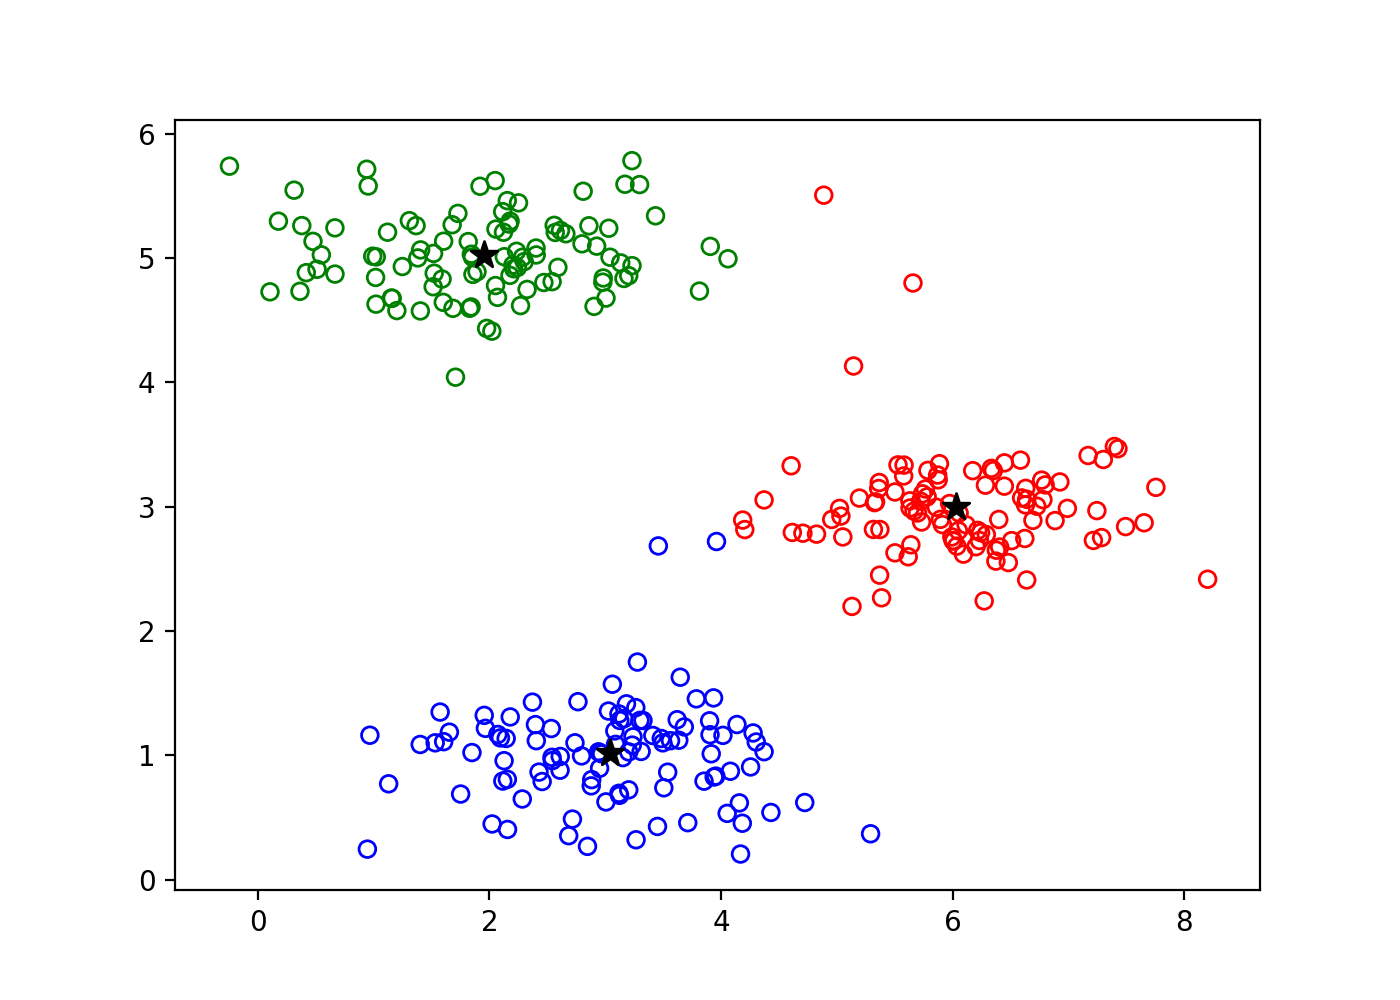

In [46]:
# initialize some variable
centroid = np.zeros((K,X.shape[1]))
clust_x = np.zeros((m,),dtype=int)
centroid_min = np.zeros((K,X.shape[1]))
clust_x_min = np.zeros((m,),dtype=int)
Jmin = np.inf

# K-means with random initialization and  multiple runs
def K_means_multi_run(X,centroid,clust_x,centroid_min,clust_x_min,Jmin,monte_carlo=100):
    m = X.shape[0]
    k = centroid.shape[0]
    for p in range(monte_carlo):
        rand = np.random.permutation(m)
        centroid =  X[rand[:k]] 
        centroid,clust_x = K_means(X,clust_x,centroid)
        J=0
        for c in range(k):
            J += np.sum(euclidean_dist(X[clust_x==c], centroid[c]))/m
        if(J<Jmin):
            Jmin = J 
            centroid_min = centroid
            clust_x_min = clust_x
    return centroid_min,clust_x_min,Jmin

centroid_min,clust_x_min,Jmin = K_means_multi_run(X,centroid,clust_x,centroid_min,clust_x_min,Jmin)
print("The minimum error is:",Jmin)
print("it was get for the following cluster centroids:\n",centroid_min)

# plot final clusters and centroids
plt.figure("K-means with multiple runs",figsize=(7,5))
plt.scatter(X[clust_x_min==0,0],X[clust_x_min==0,1],color="blue",marker='o',facecolors='none')
plt.scatter(X[clust_x_min==1,0],X[clust_x_min==1,1],color="red",marker='o',facecolors='none')
plt.scatter(X[clust_x_min==2,0],X[clust_x_min==2,1],color="green",marker='o',facecolors='none')
plt.scatter(centroid_min[:,0],centroid_min[:,1],color="black",marker='*',s=100)

### Choose the number of cluster K
We are in the case of unsupervised learning and we don't known labels or number cluster in our data. However, K-mean clustering algorithm need to known in advance the number of cluster K. Hence, we will run K-means for different number of cluster K and we will choose the number that reasonable performance and error. 

<font color="blue">**Question 3: **</font> 
- Use (make_bolbs)[http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html] function from sklearn library to generate some random clusters. Use the following argument:  
n_samples=1000, n_features=2, centers=7, cluster_std=1.2 and random_state=0 

<IPython.core.display.Javascript object>


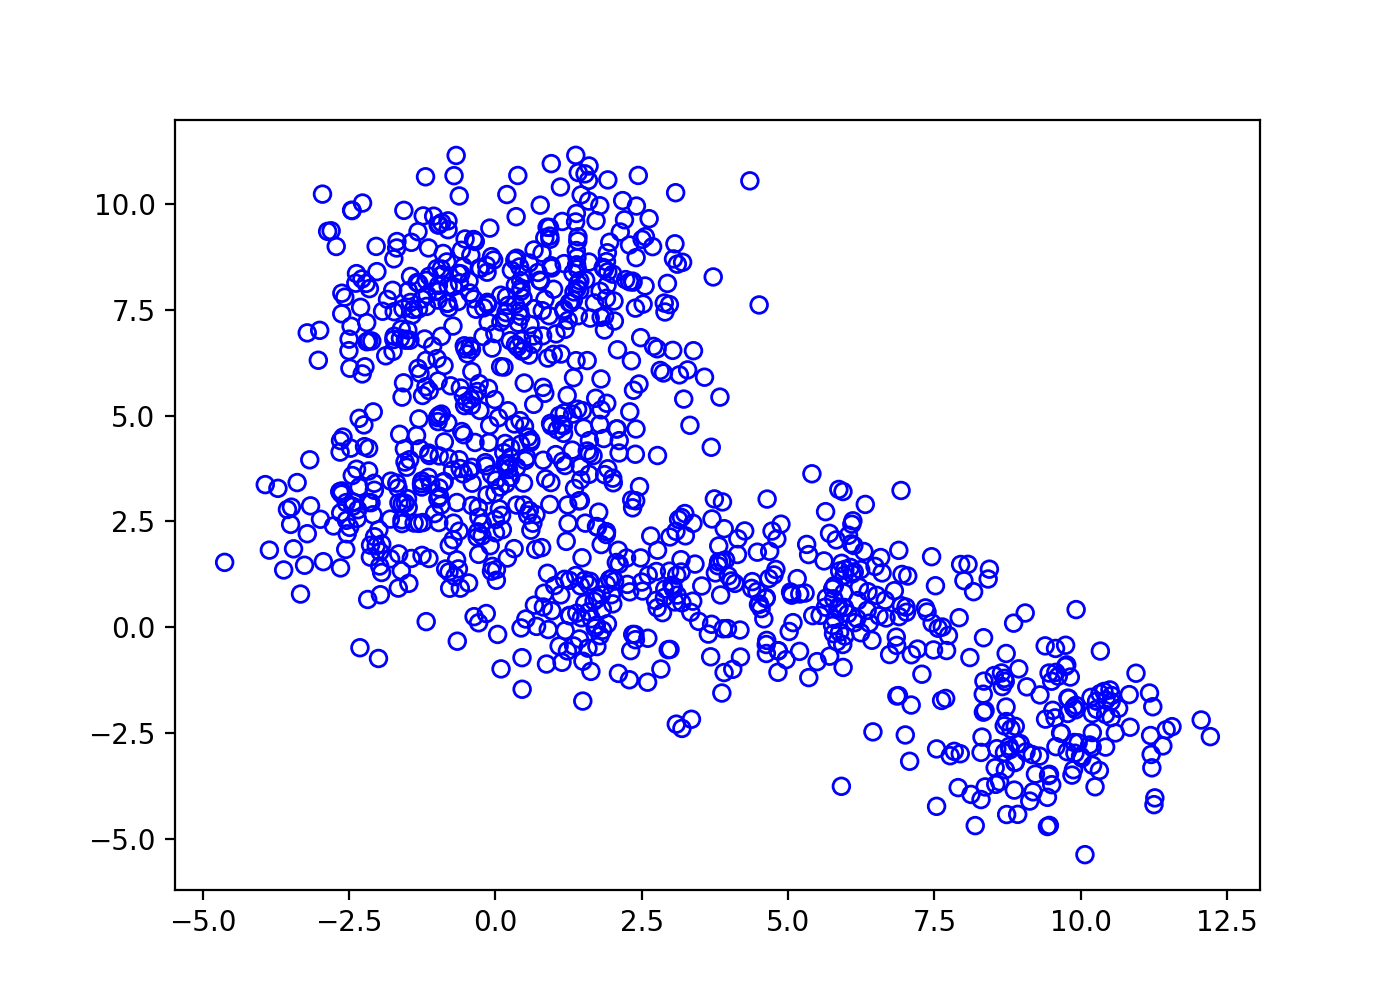

In [38]:
from sklearn.datasets.samples_generator import make_blobs

# generate clusters
X, y =  make_blobs(n_samples=1000, centers=7, n_features=2,cluster_std=1.2 ,random_state=0)

# plot clusters
plt.figure("More clusters",figsize=(7,5))
plt.scatter(X[:,0],X[:,1],color="blue",marker='o',facecolors='none')


<font color="blue">**Question 4: **</font> 
- Call "K_means_multi_run" function to calculate "centroid_min", "clust_x_min" and "Jmin".
- Add the value of minimum error "Jmin" to the "error_list".
- From the graph could you deduce the best number of cluster?  

**Warning:** This block of code may take 1 to 2 minutes to run. Please be patient.

Clustering error for different value of K are  [3.0443975715622411, 0.88886173207568508, 0.70494075051654592, 0.53703056511123293, 0.40254458533049825, 0.34150898132691071, 0.29562877734604243, 0.25437514644652415]


<IPython.core.display.Javascript object>


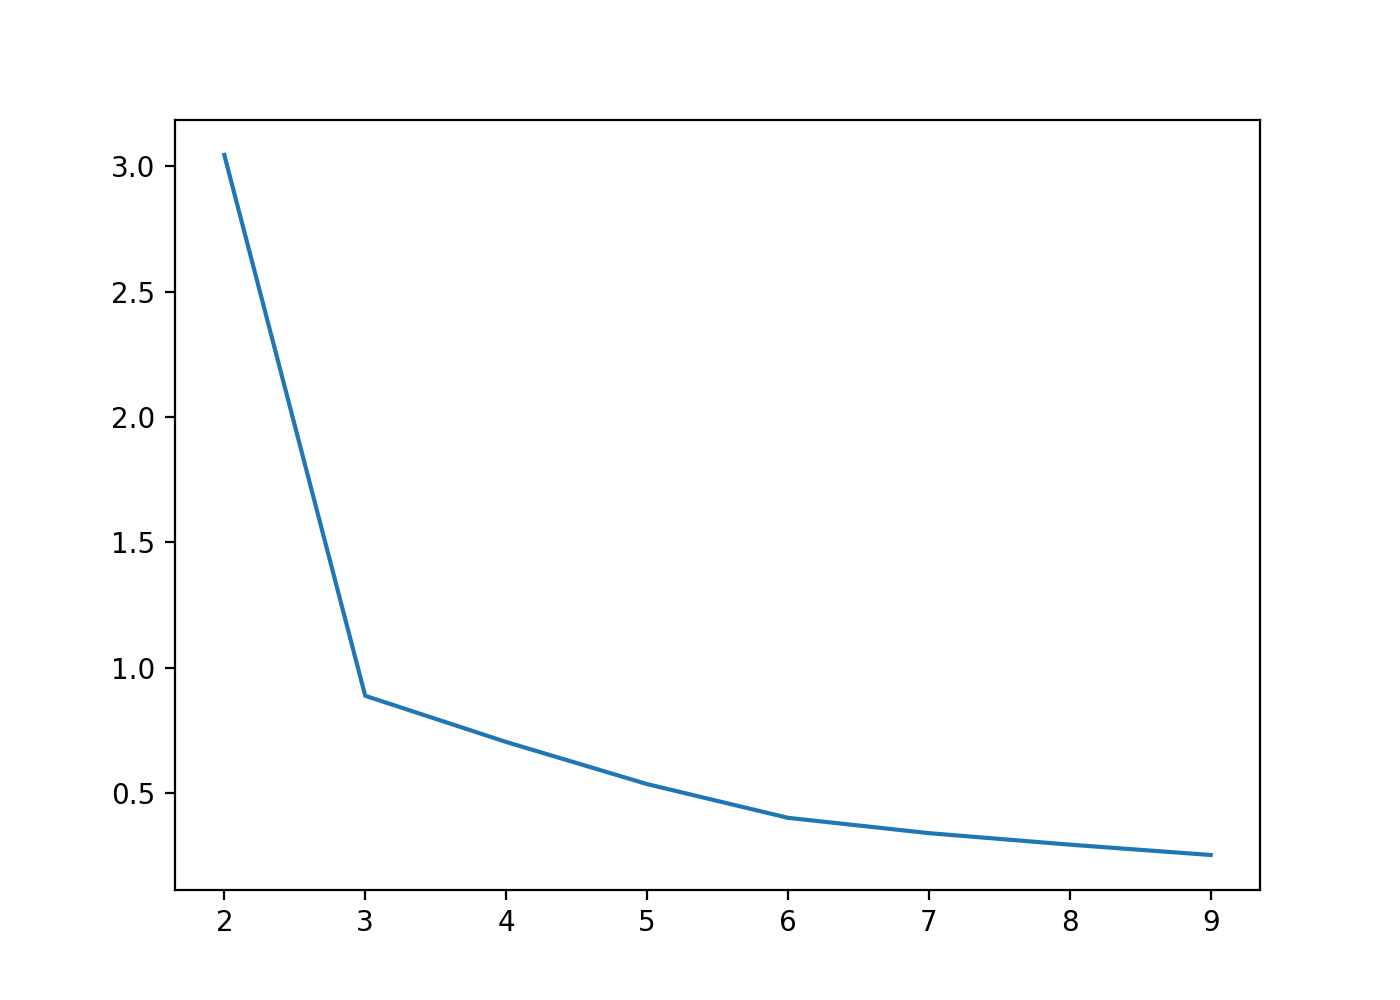

In [48]:
m=X.shape[0]
K_max=10
error_list=[]

# initialize some variable
clust_x = np.zeros((m,),dtype=int)
clust_x_min = np.zeros((m,),dtype=int)

for k in range(2,K_max):
    centroid = np.zeros((k,X.shape[1]))
    centroid_min = np.zeros((k,X.shape[1]))
    Jmin=np.inf 

    centroid_min,clust_x_min,Jmin=K_means_multi_run(X,centroid,clust_x,centroid_min,clust_x_min,Jmin,monte_carlo=100)

    error_list.append(Jmin)
    

print("Clustering error for different value of K are ",error_list)
plt.figure("clustering error vs number of cluster K",figsize=(7,5))
plt.plot(np.arange(2,K_max),error_list)


